In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [4]:
df=pd.read_csv('College_Data')
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [5]:
from  sklearn.preprocessing import  LabelEncoder
le=LabelEncoder()
df['Private']=le.fit_transform(df['Private'])
df=df.drop(['Unnamed: 0'], axis=1)


# Remove Outliers

In [6]:
df.skew()

Private       -1.021933
Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

In [7]:
from scipy import stats
z=np.abs(stats.zscore(df))
df1=df[(z<2.2).all(axis=1)]
df1

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
5,1,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,1,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,1,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,1,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
10,1,1732,1425,472,37,75,1830,110,16548,5406,500,600,82,88,11.3,31,10932,73
11,1,2652,1900,484,44,77,1707,44,17080,4440,400,600,73,91,9.9,41,11711,76
12,1,1179,780,290,38,64,1130,638,9690,4785,600,1000,60,84,13.3,21,7940,74


In [8]:
df.skew()

Private       -1.021933
Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

In [9]:
df1.skew()

Private       -1.338542
Apps           1.870250
Accept         1.768443
Enroll         1.869209
Top10perc      0.700938
Top25perc      0.113118
F.Undergrad    2.155271
P.Undergrad    2.237206
Outstate       0.333125
Room.Board     0.325233
Books          0.189362
Personal       0.621902
PhD           -0.179342
Terminal      -0.347425
S.F.Ratio      0.457078
perc.alumni    0.238059
Expend         0.966992
Grad.Rate      0.069192
dtype: float64

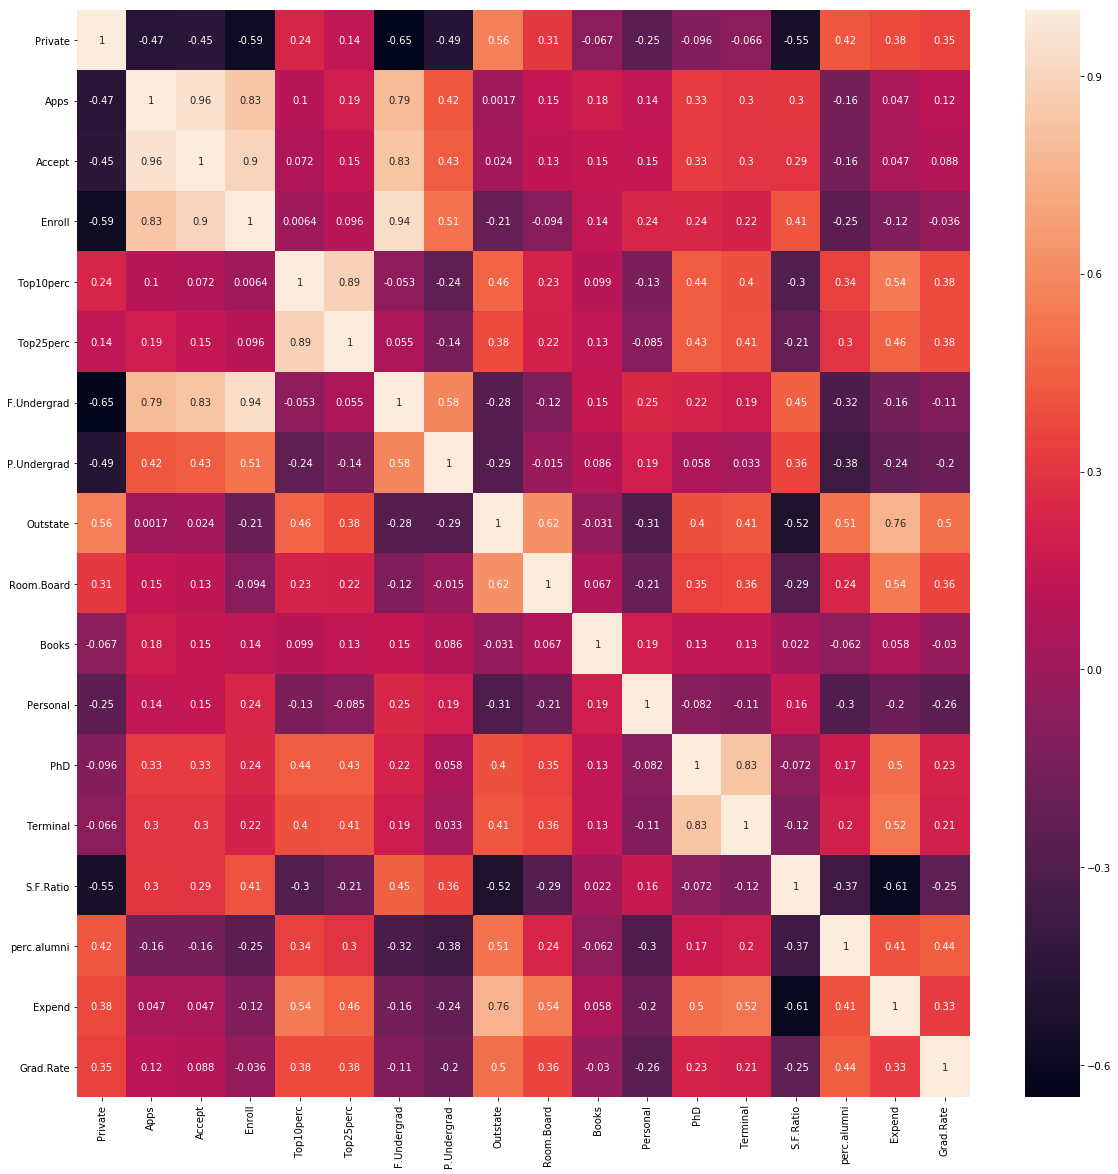

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)

# Kmeans

In [48]:
x=df1.iloc[0:,[8,17]]
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) 

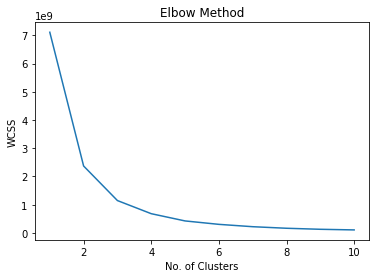

In [49]:
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [50]:
kmeans=KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state=None)

In [51]:
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([3, 0, 0, 0, 0, 0, 2, 2, 2, 3, 0, 3, 3, 3, 0, 3, 1, 0, 0, 0, 0, 0,
       3, 3, 3, 2, 0, 1, 0, 3, 3, 3, 2, 1, 3, 0, 3, 3, 3, 1, 1, 3, 1, 3,
       0, 3, 3, 3, 2, 0, 0, 3, 3, 0, 3, 3, 3, 3, 1, 0, 0, 0, 3, 0, 3, 3,
       0, 0, 1, 3, 0, 1, 1, 1, 3, 2, 0, 3, 3, 3, 3, 2, 0, 2, 3, 1, 0, 3,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 2, 3, 3, 1, 0, 3, 2, 0, 2,
       3, 3, 3, 0, 0, 2, 0, 2, 1, 1, 3, 3, 3, 0, 2, 3, 2, 1, 1, 1, 0, 1,
       3, 3, 2, 0, 2, 0, 3, 1, 3, 0, 1, 2, 1, 0, 3, 3, 1, 1, 3, 3, 0, 1,
       3, 0, 0, 3, 3, 0, 0, 2, 3, 3, 0, 0, 3, 2, 3, 1, 0, 3, 3, 1, 0, 0,
       1, 3, 1, 1, 2, 3, 3, 0, 0, 2, 0, 0, 0, 3, 3, 3, 3, 3, 2, 0, 3, 3,
       0, 3, 3, 1, 0, 3, 2, 3, 3, 3, 2, 3, 0, 2, 3, 2, 1, 3, 1, 1, 0, 0,
       2, 3, 3, 2, 1, 1, 0, 1, 1, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       3, 3, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 3, 1, 3, 0, 3, 1, 0, 3,
       3, 3, 3, 0, 0, 1, 3, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 3, 1, 1, 3, 3,
       0, 3, 0, 0, 3, 2, 1, 0, 3, 0, 3, 1, 3, 3, 1,

In [52]:
import numpy as np
x=np.array(x)

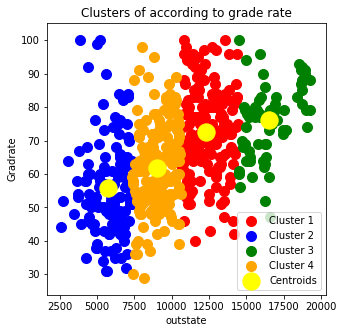

In [55]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of according to grade rate')
plt.xlabel('outstate')
plt.ylabel('Gradrate')
plt.legend()
plt.show()